In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [16]:
# Load and preprocess the MNIST dataset online
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
# Build a basic CNN model
model = models.Sequential()

In [19]:
# # Convolutional layers with activation and max pooling
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
from keras import layers, models

model = models.Sequential()

# Convolutional layers with activation and max pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers with activation
model.add(layers.Dense(64, activation='tanh'))  # Changed activation to tanh

# Output layer with softmax activation for multiclass classification
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [24]:
# # Flatten layer to transition from convolutional layers to dense layers
# model.add(layers.Flatten())

# # Dense layers with activation
# model.add(layers.Dense(64, activation='relu'))

# # Output layer with softmax activation for multiclass classification
# model.add(layers.Dense(10, activation='softmax'))



In [27]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [28]:
# Train the model with data augmentation
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [32]:
datagen.fit(train_images)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=5, validation_data=(test_images, test_labels))



Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1829 - accuracy: 0.9435 - val_loss: 0.1104 - val_accuracy: 0.9657
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1752 - accuracy: 0.9457 - val_loss: 0.0822 - val_accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1685 - accuracy: 0.9474 - val_loss: 0.0680 - val_accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1626 - accuracy: 0.9499 - val_loss: 0.0728 - val_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1597 - accuracy: 0.9494 - val_loss: 0.0789 - val_accuracy: 0.9758


In [34]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0789 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


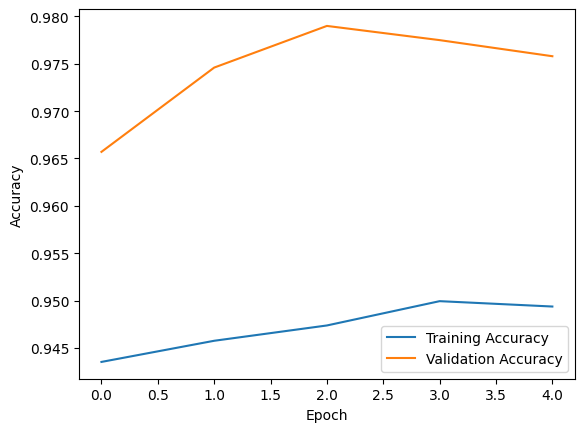

In [35]:
# Visualize the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Transfer learning using VGG16 as the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset online
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert images to 3 channels to match the VGG16 input shape
train_images = tf.concat([train_images, train_images, train_images], axis=-1)
test_images = tf.concat([test_images, test_images, test_images], axis=-1)

# Resize images to the expected input shape of VGG16 (32, 32, 3)
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

# Convert labels to categorical format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Transfer learning using VGG16 as the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base
model_transfer = models.Sequential()

# Add the VGG16 base model (excluding the top layers) to the new model
model_transfer.add(base_model)
model_transfer.add(layers.GlobalAveragePooling2D())
model_transfer.add(layers.Dense(64, activation='relu'))
model_transfer.add(layers.Dense(10, activation='softmax'))

# Compile the transfer learning model
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the transfer learning model architecture
model_transfer.summary()

# Train the transfer learning model
history_transfer = model_transfer.fit(datagen.flow(train_images, train_labels, batch_size=32),
                                     steps_per_epoch=len(train_images) / 32, epochs=1,
                                     validation_data=(test_images, test_labels))

# Evaluate the transfer learning model on the test set
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(test_images, test_labels)
print(f'Transfer learning test accuracy: {test_acc_transfer}')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 14748170 (56.26 MB)
Trainable params: 33482 (130.79 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
  44/1875 [..............................] - ETA: 11:59 - loss: 1.9626 - a